In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('heart_disease.csv')

In [39]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
X = df.drop('target',axis=1)
y = df['target']

X = (X-X.min())/(X.max()-X.min())
y = (y-y.min())/(y.max()-y.min())

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)

In [62]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dtree))
print(confusion_matrix(y_test,pred_dtree))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76        45
         1.0       0.77      0.74      0.76        46

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

[[35 10]
 [12 34]]


In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [65]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81        45
         1.0       0.80      0.87      0.83        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[35 10]
 [ 6 40]]


In [66]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [67]:
features = list(df.columns[1:])
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

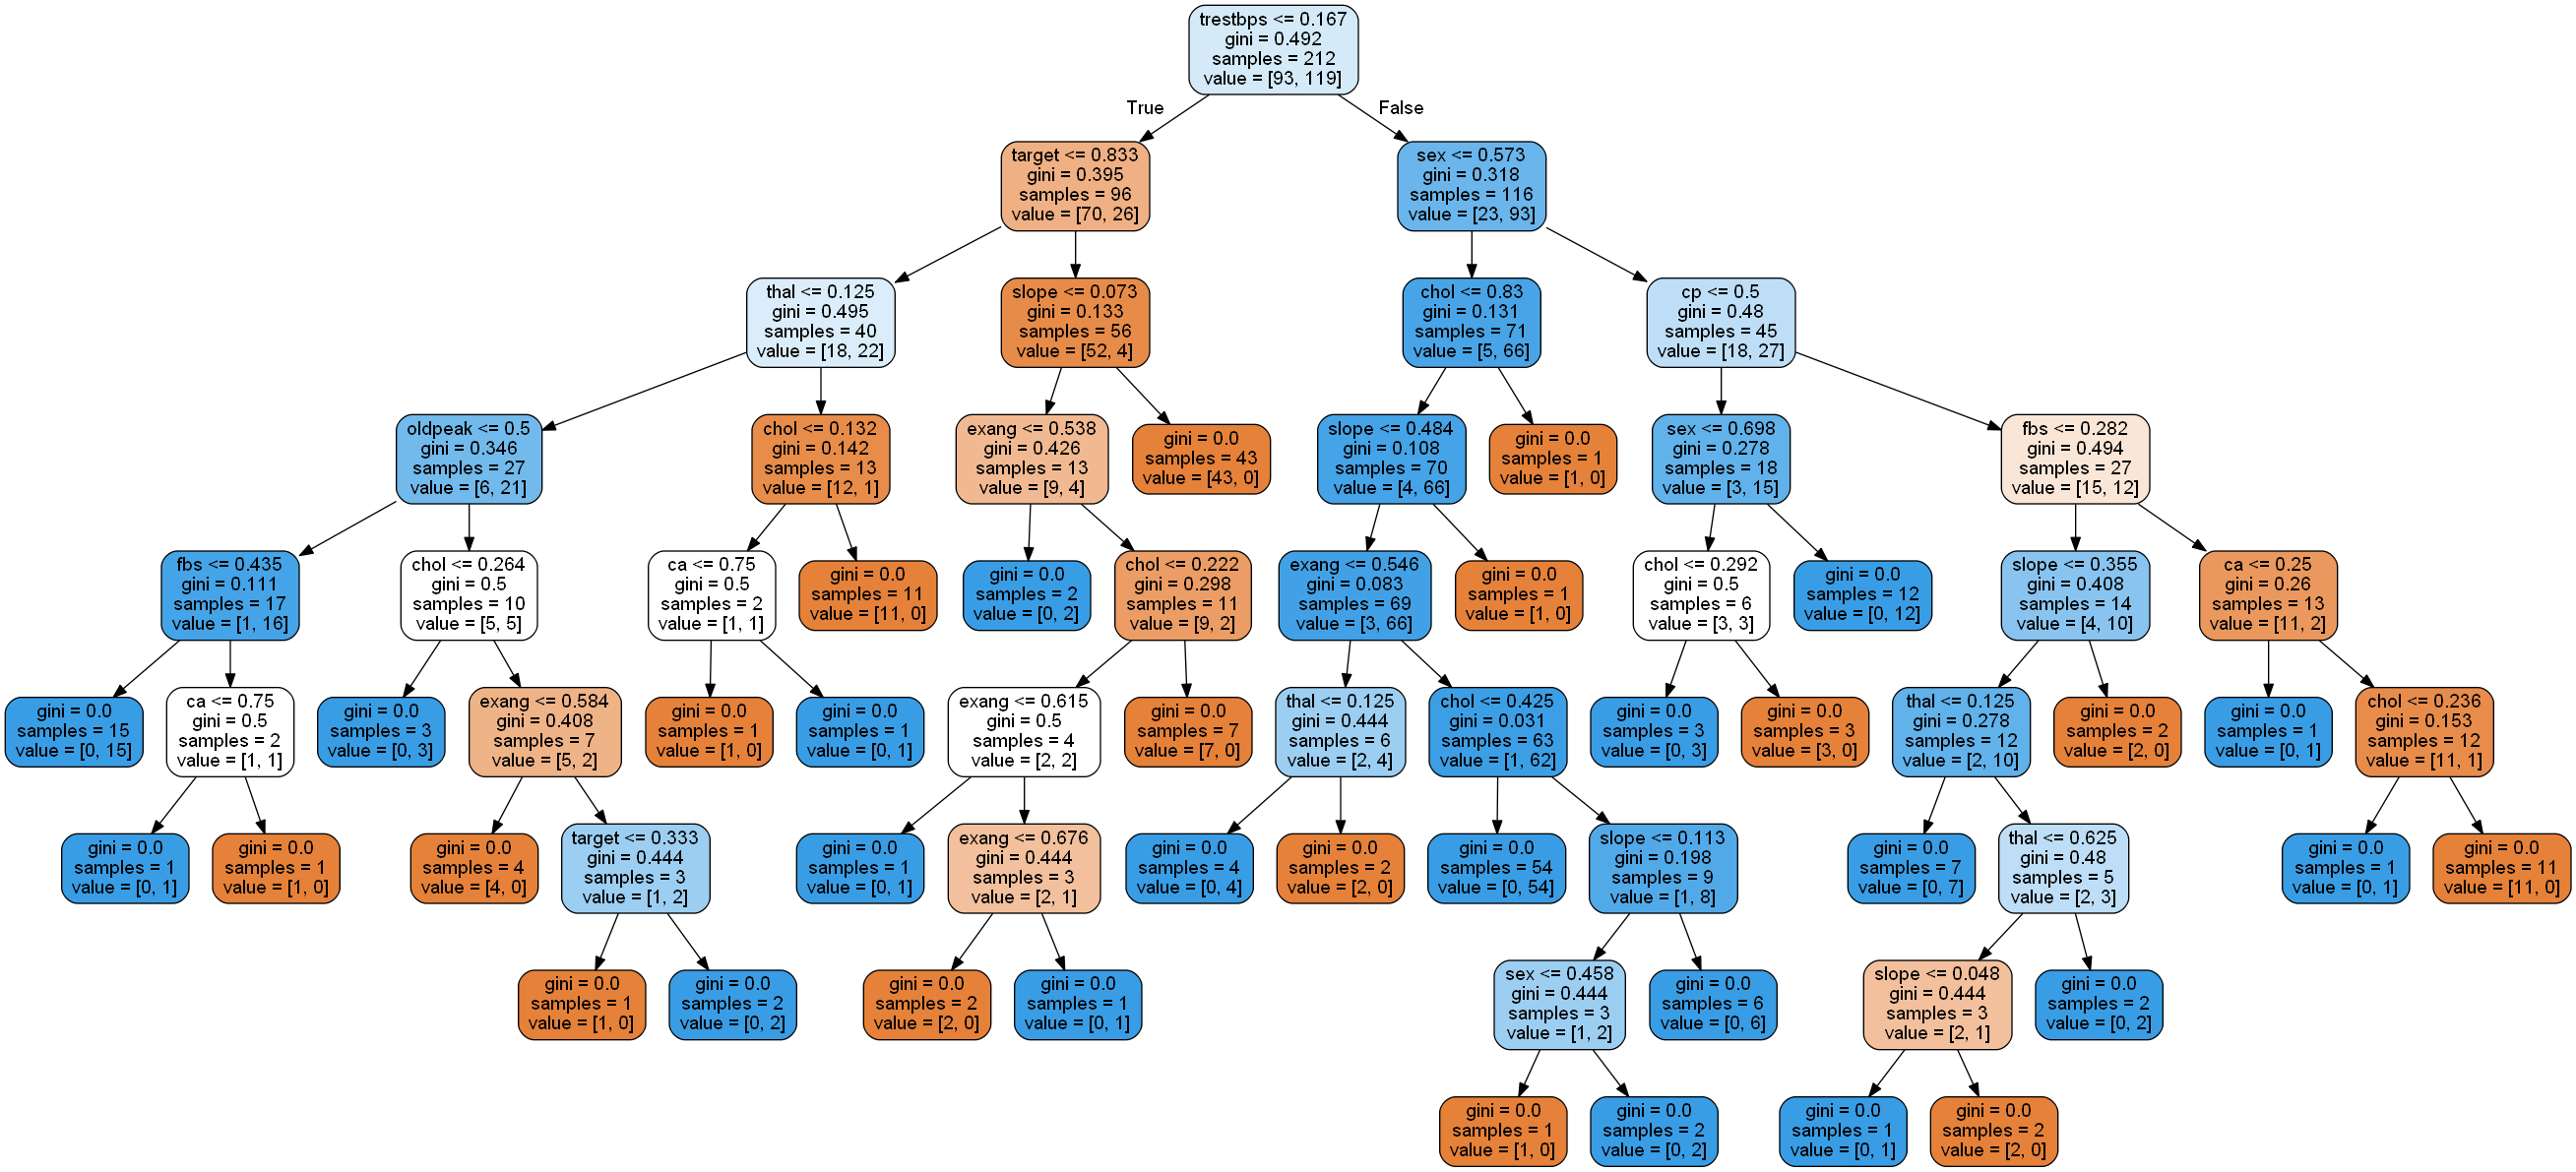

In [68]:
Image(graph[0].create_png()) 

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_nb = model.predict(X_test)

In [70]:
print(classification_report(y_test,pred_nb))
print(confusion_matrix(y_test,pred_nb))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        45
         1.0       0.79      0.80      0.80        46

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[35 10]
 [ 9 37]]


In [85]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

In [86]:
print(classification_report(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))

              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81        45
         1.0       0.79      0.89      0.84        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[34 11]
 [ 5 41]]


In [96]:
final_pred = (1/4)*(pred_dtree+pred_rfc+pred_nb+pred_svc)

In [101]:
i = 0
for pred in final_pred:
    final_pred[i] < 0.5
    if (final_pred[i] < 0.5):
        final_pred[i] = 0
    else:
        final_pred[i] = 1        
    i += 1

In [102]:
final_pred

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1.])

In [103]:
print(classification_report(y_test,final_pred))
print(confusion_matrix(y_test,final_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80        45
         1.0       0.78      0.91      0.84        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[33 12]
 [ 4 42]]
